<a href="https://colab.research.google.com/github/Carol-Nunes/Face-Recognition-System/blob/main/yolov3_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando o Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clonando o Darknet

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/Face_Recognition/darknet'

Cloning into '/content/drive/MyDrive/Face_Recognition/darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15873 (delta 3), reused 0 (delta 0), pack-reused 15863 (from 3)
Receiving objects: 100% (15873/15873), 14.47 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (10686/10686), done.
Updating files: 100% (2055/2055), done.


In [ ]:
# Compilar Darknet usando GPU: fazer alterações no makefile, GPU, CUDNN, OPENCV=1

%cd /content/drive/MyDrive/Face_Recognition/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/drive/.shortcut-targets-by-id/1POSDob5YiBHhRKJWMLhP3JvmYT_ZuXwZ/Face_Recognition/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, 

# Atualizar o arquivo CFG da YOLOV4 para treinamento

In [ ]:
# Fazendo uma cópia do arquivo CFG para que seja possível fazer as alterações necessárias

!cp cfg/yolov3.cfg cfg/yolov3_custom_training.cfg

In [ ]:
# Fazendo as alterações necessárias

!sed -i 's/batch=1/batch=32/' cfg/yolov3_custom_training.cfg
!sed -i 's/subdivisions=1/subdivisions=8/' cfg/yolov3_custom_training.cfg
!sed -i 's/max_batches = 500200/max_batches=6000/' cfg/yolov3_custom_training.cfg
!sed -i '610 s@classes=80@classes=3@' cfg/yolov3_custom_training.cfg
!sed -i '696 s@classes=80@classes=3@' cfg/yolov3_custom_training.cfg
!sed -i '783 s@classes=80@classes=3@' cfg/yolov3_custom_training.cfg
!sed -i '603 s@filters=255@filters=24@' cfg/yolov3_custom_training.cfg
!sed -i '689 s@filters=255@filters=24@' cfg/yolov3_custom_training.cfg
!sed -i '776 s@filters=255@filters=24@' cfg/yolov3_custom_training.cfg

In [ ]:
# Para treinamento é preciso comentar o tamanho e a subdivisão do lote de teste

!sed -i '3 s@batch=1@# batch=1@' cfg/yolov3_custom_training.cfg
!sed -i '4 s@subdivisions=1@# subdivisions=1@' cfg/yolov3_custom_training.cfg
!sed -i '6 s@# batch=64@batch=64@' cfg/yolov3_custom_training.cfg
!sed -i '7 s@# subdivisions=16@subdivisions=16@' cfg/yolov3_custom_training.cfg

# Configurar os arquivos de configuração de dados

In [ ]:
# Caminho para o diretório onde o arquivo será salvo
images_dir = '/content/drive/MyDrive/Face_Recognition/images'

# Lista de classes que você deseja adicionar ao arquivo 'classes.names'
classes = ['Ariana', 'Madison', 'Selena']

# Criar e escrever no arquivo 'classes.names'
with open(images_dir + '/classes.names', 'w') as file:
    for class_name in classes:
        file.write(class_name + '\n')

# Criando o arquivo path_data.data

In [ ]:
with open('/content/drive/MyDrive/Face_Recognition' + '/path_data.data', 'w') as content:

    content.write('classes = 3\n')

    # Localização do arquivo train.txt
    content.write('train = ' + '/content/drive/MyDrive/Face_Recognition/images' + '/train.txt\n')

    # Localização do arquivo test.txt
    content.write('valid = ' + '/content/drive/MyDrive/Face_Recognition/images' + '/test.txt\n')

    # Localização do arquivo classes.names
    content.write('names = ' + '/content/drive/MyDrive/Face_Recognition/images' + '/classes.names\n')

    # Localizaçao da pasta de backup
    content.write('backup = ' + '/content/drive/MyDrive/Face_Recognition/backup')

In [ ]:
# Criação da pasta de backup

!mkdir /content/drive/MyDrive/Face_Recognition/backup

# Criando os arquivos train.txt e test.txt

In [ ]:
import os

# Caminho completo das imagens e seus rótulos

train_images = [os.path.join('/content/drive/MyDrive/Face_Recognition/images/train', img) for img in os.listdir('/content/drive/MyDrive/Face_Recognition/images/train') if img.endswith(('.png', '.jpeg', '.jpg'))]
test_images = [os.path.join('/content/drive/MyDrive/Face_Recognition/images/test', img) for img in os.listdir('/content/drive/MyDrive/Face_Recognition/images/test') if img.endswith(('.png', '.jpeg', '.jpg'))]

# Criar arquivo train.txt

with open('/content/drive/MyDrive/Face_Recognition/images/train.txt', 'w') as f:
     for img_path in train_images:
            f.write(f"{img_path}\n")

# Criar arquivo test.txt

with open('/content/drive/MyDrive/Face_Recognition/images/test.txt', 'w') as f:
     for img_path in test_images:
            f.write(f"{img_path}\n")


# Cálculo dos pesos

In [ ]:
# Aqui será usado o Transfer Learning

!wget -P '/content/drive/MyDrive/Face_Recognition/custom_weights' 'https://pjreddie.com/media/files/darknet53.conv.74'

--2025-02-22 00:28:31--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/Face_Recognition/custom_weights/darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  42.0MB/s    in 3.9s    

2025-02-22 00:28:35 (40.1 MB/s) - ‘/content/drive/MyDrive/Face_Recognition/custom_weights/darknet53.conv.74’ saved [162482580/162482580]



# Início do Treinamento

In [ ]:
%cd /content/drive/MyDrive/Face_Recognition/darknet
!chmod +x ./darknet

/content/drive/.shortcut-targets-by-id/1POSDob5YiBHhRKJWMLhP3JvmYT_ZuXwZ/Face_Recognition/darknet


In [ ]:
!./darknet detector train /content/drive/MyDrive/Face_Recognition/path_data.data  /content/drive/MyDrive/Face_Recognition/darknet/cfg/yolov3_custom_training.cfg /content/drive/MyDrive/Face_Recognition/darknet/backup/yolov3_custom_training_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 55730, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.802041), count: 3, class_loss = 0.011974, iou_loss = 0.092483, total_loss = 0.104457 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.745451), count: 1, class_loss = 0.009789, iou_loss = 0.045089, total_loss = 0.054878 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 55734, rewritten_bbox = 0.000000 % 

 Tensor Cores are used.
5867/6000: loss=0.0 hours left=0.2
 5867: 0.049770, 0.073942 avg loss, 0.001000 rate, 3.739938 seconds, 187744 images, 0.178869 hours left
Loaded: 0.000110 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.865814), count: 4, class_loss = 0.012181, iou_loss = 0.080576, total_los

# Testando

In [2]:
# Comentando os parâmetros de treinamento

!sed -i '3 s@# batch=64@batch=1@' cfg/yolov3_custom_training.cfg
!sed -i '4 s@# subdivisions=16@subdivisions=1@' cfg/yolov3_custom_training.cfg
!sed -i '6 s@batch=64@#batch=64@' cfg/yolov3_custom_training.cfg
!sed -i '7 s@subdivisions=16@#subdivisions=16@' cfg/yolov3_custom_training.cfg

sed: can't read cfg/yolov3_custom_training.cfg: No such file or directory
sed: can't read cfg/yolov3_custom_training.cfg: No such file or directory
sed: can't read cfg/yolov3_custom_training.cfg: No such file or directory
sed: can't read cfg/yolov3_custom_training.cfg: No such file or directory


In [108]:
# Carregando o modelo, as classes e os pesos

import numpy as np
import time
import cv2

input_file = '/content/drive/MyDrive/Face_Recognition/images/test/gettyimages-489892550-2048x2048_jpg.rf.ea953f8b37b66ad4ac24e697ec082640.jpg'
labels_file = '/content/drive/MyDrive/Face_Recognition/images/classes.names'
config_file = '/content/drive/MyDrive/Face_Recognition/darknet/cfg/yolov3_custom_training.cfg'
weights_file = '/content/drive/MyDrive/Face_Recognition/darknet/backup/yolov3_custom_training_final.weights'
confidence_threshold = 0.5

classes = open(labels_file).read().strip().split("\n")

net = cv2.dnn.readNetFromDarknet(config_file, weights_file)

In [109]:
# Lendo a imagem de entrada e processando-a para a darknet

image = cv2.imread(input_file)
(H, W) = image.shape[:2]

In [110]:
# Convertendo a imagem de entrada para o formato que YOLO Net aceita

blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layersOutputs = net.forward(net.getUnconnectedOutLayersNames())
end = time.time()

print("Tempo de processamento: {:.6f} segundos".format(end - start))

Tempo de processamento: 3.029584 segundos


In [111]:
# Determinedo apenas os nomes das camdas de saída que precisamos do YOLO

ln = net.getLayerNames()
ln = [ln[i-1] for i in net.getUnconnectedOutLayers()]

Detection Image Result


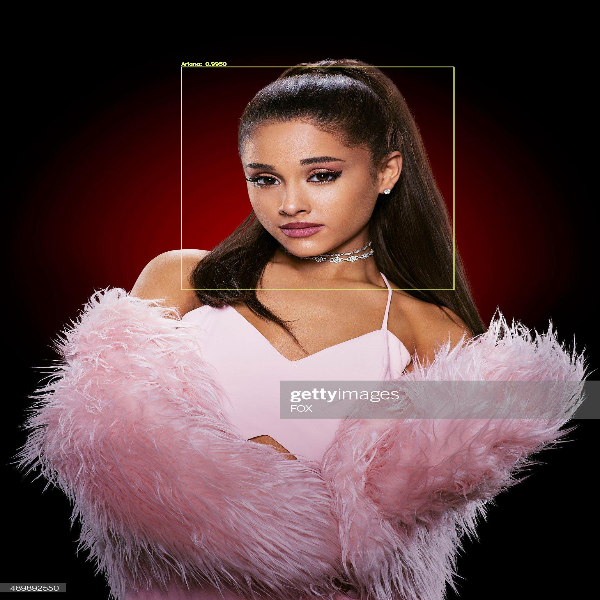

In [112]:
# Prevendo e desenhando as caixas previstas
from google.colab.patches import cv2_imshow

boxes =[]
confidences = []
classIDs = []

for output in layersOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > confidence_threshold:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)


idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, confidence_threshold)

colors = np.random.uniform(0, 255, size=(len(classes), 3))

if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        color = [int(c) for c in colors[classIDs[i]]]

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

print("Detection Image Result")
image = cv2.resize(image, (600, 600))
cv2_imshow(image)